<a href="https://colab.research.google.com/github/Sirsha2468/Introduction-to-AI-ML/blob/main/Sirsha's_Machine_learning_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Hierarchical Clustering

A Hierarchical clustering method works via grouping data into a tree of clusters. It groups data points with similar characteristics together. The algorithm on itself deduces the optimum number of clusters and displays it in the form of a tree-like structure.

Let us understand this concept using a simple example. 

Imagine that we were simply presented with two features
of animals: 
- `height` (measured from the tip of the nose to the end of the tail).
- `weight`

|height|weight|
|-|-|
|22|40|
|25|43|
|17|37|
|35|60|
|37|53|
|41|62|

Since we are given only the animal's heights and weights, we won't be able to speculate the exact name of each species. However, by creating clusters of these animals on the basis of the features provided, we can derive different categories of animal species that exist in this dataset. 



In [ ]:
# Create a nested list of animal heights and weights.
#[[22, 40], [24, 43], [17, 37], [35, 60], [37, 53], [41, 62]]
import pandas as pd
animal_list = [[22, 40], [24, 43], [17, 37], [35, 60], [37, 53], [41, 62]]
print(animal_list)


[[22, 40], [24, 43], [17, 37], [35, 60], [37, 53], [41, 62]]


In [ ]:
import numpy as  np
# This helps to create array DS
# Numpy = Numerical Python, we can do all the mathematical operations
animal_i = np.array(animal_list)
print(animal_i)

[[22 40]
 [24 43]
 [17 37]
 [35 60]
 [37 53]
 [41 62]]


In [ ]:
animal_i[:, 0]
animal_i[:, 1]


array([40, 43, 37, 60, 53, 62])

Let's plot the above data points using a scatter plot. Also, annotate each data point with a number. For example, the first data point must be labelled as `1`, the second data point must be labelled as `2` and so on. For this purpose, use the `annotate()` function of `matplotlib.pyplot` module. 

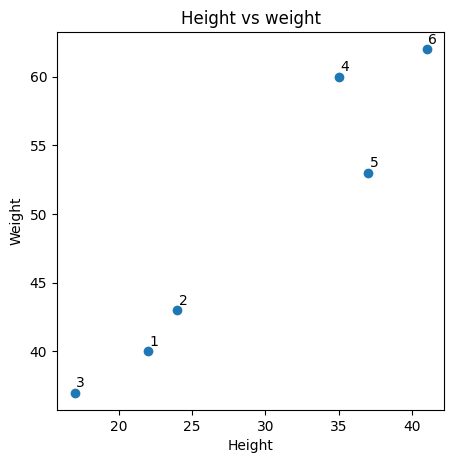

In [ ]:
# Create a scatter plot showing animal height and weight with each animal numbered from 1 to 6.
import matplotlib.pyplot as plt

animal_label = range(1, 7)
plt.figure(figsize = (5, 5), dpi = 100)
plt.title("Height vs weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter
plt.scatter(animal_i[:, 0], animal_i[:, 1])
for i, j, k in zip(animal_label, animal_i[:, 0], animal_i[:, 1]) :
  plt.annotate(i, xy = (j, k), xytext = (1, 4), textcoords = ("offset points"))
plt.show()

In [ ]:
test_zip = list(zip(animal_label, animal_i[:, 0], animal_i[:, 1])) 
print(test_zip)
zip(animal_label, animal_i[:, 0], animal_i[:, 1])

[(1, 22, 40), (2, 24, 43), (3, 17, 37), (4, 35, 60), (5, 37, 53), (6, 41, 62)]


---

One approach of hierarchical clustering is by starting with each data point in its own cluster and recursively joining the similar points together to form clusters. This approach is known as **Agglomerative hierarchical clustering**.

**Agglomerative hierarchical clustering:**
- This algorithm begins with each data point as a single cluster and then combines the closest pair of clusters together. 
- It does this until all the clusters are merged into a single cluster that contains all the data points.

Let us learn how agglomerative hierarchical clustering works on the above dataset.

**Step 1:** The clustering begins with each data point in its own cluster. 



**Step 2:** Take two closest data points or clusters and merge them to form one cluster. For this, the Euclidean distance between each  data point is calculated.

**Step 3:** Again, take the two closest clusters and merge them together to form one cluster. 


**Step 4:** Repeat Step 3 until only one cluster is left. So, we will get the following clusters. 

The sequences of these merges are recorded in a tree-like structure called a **dendrogram**. Dendrograms provides a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

#### Implementing Dendrogram using Python

Before implementing the dendrogram, we will first understand different linkage methods, as this is an important parameter for dendrogram plotting.

**Linkage:**

In general, the linkage is distance between two clusters.

In the previous activity, we merged two clusters by considering the minimum distance between two clusters as the new distance of the merged cluster. This method is known as *Single Linkage*. 

However, this is not the only option when it comes to clustering data points together. Other choices for determining distances between clusters are as follows:

<img src="https://editor.analyticsvidhya.com/uploads/40351linkages.PNG"/>

**1. Single Linkage**
  - In a single linkage, the distance between two clusters is the shortest distance between two points in the two clusters.




**2. Complete Linkage**

  - It is the opposite of single linkage.
  - In complete linkage, the distance between two clusters is the farthest distance between two points in two clusters.

    



**3. Average Linkage**
  -  It is between single and complete linkage.   
  - In average linkage, the distance between two clusters is the average distance between every point of one cluster to every other point of the other cluster.

**4. Centroid Linkage**
  - In centroid linkage, the distance between two clusters is the distance between centroids of those clusters.



**5. Ward Linkage**
 - This approach  is the same as Average Linkage except that Ward's method calculates the sum of the square of the distances between every point of one cluster to every other point of the other cluster.

From the above given linkage methods, we can apply any of them according to the type of problem or business requirement.


**Plotting Dendrogram:**

The `scipy.cluster` module equips us with tools that are needed for hierarchical clustering and dendrogram plotting.

The dendrogram can be plotted easily using the linkage matrix. A linkage matrix is created via `linkage()` function. This matrix contains the distance between clusters based on the specified linkage method. Following is the syntax of `linkage()` function:

`hierarchy.linkage(data, method= 'single')`

Here, 
 - `data:` The dataset (input 1D/2D array).
 - `method`: Linkage methods. Default value is `'single'`. Other values are `'complete'`, `'average'`, `'centroid'`, `'ward'`.

Follow the steps given below to plot the dendrogram:

1. Import `linkage` and `dendrogram` functions from `scipy.cluster.hierarchy` module.
2. Call `linkage()` function and pass `animals_arr` dataset and `method = single` as inputs. Store the returned linkage matrix in a `s_distances` variable.
3.  Plot the dendrogram by calling the `dendrogram()` function and pass the linkage matrix `s_distances` as input to this function. Also, pass `labels = animal_lbl` as input to `dendrogram()` function to label the data points on $x$-axis.

4. Also, set the `xlabel` and `ylabel` of this dendrogram using `matplotlib.pyplot` module.

#### Activity 1: Import Modules and Read Data

Import the necessary Python modules along with the following classes:

 - `linkage`, `dendrogram` - To create linkage and plot dendrogram. 

 - `AgglomerativeClustering` - To cluster the cars dataset. 

Read the data from a CSV file to create a Pandas DataFrame.

**Dataset link**: https://raw.githubusercontent.com/narayanan225/datasets/main/cars.csv

In [ ]:
# Import the modules and Read the data.
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
cars_df = pd.read_csv("https://raw.githubusercontent.com/narayanan225/datasets/main/cars.csv")
cars_df.head()


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


Get the total number of rows and columns, data types of columns and missing values (if exist) in the DataFrame.


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset. 
cars_df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


**Q**: Are there any null values present in the DataFrame?

**A**: No

---

#### Activity 2: Plot Dendrogram

In this activity, you need to illustrate the arrangement of the clusters produced by hierarchical clustering using a dendrogram for single and complete linkage.

Create a subset of the dataset consisting of columns with numeric values i.e `Volume`, `Weight`, and `CO2`



In [ ]:
# Create a new DataFrame consisting columns with numeric values.
cars_num = cars_df[["Volume", "Weight", "CO2"]]

# Print the first 5 rows of this new DataFrame.
cars_num.head()

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105


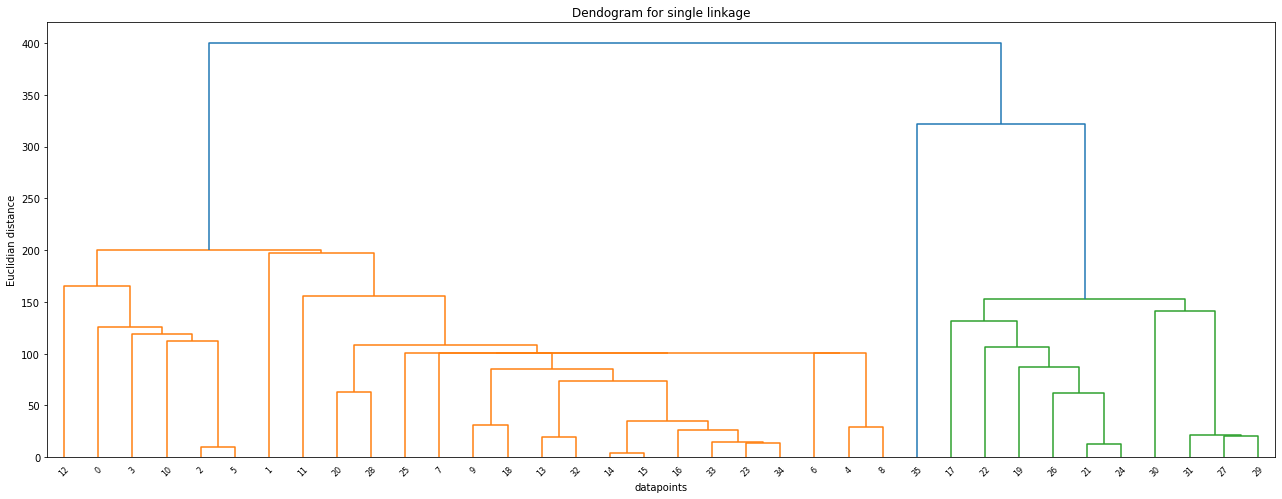

In [ ]:
# Plot dendrogram for single linkage.
# Set 'method' attribute to 'single'.
c_distance = linkage(cars_num, method = "single")

# Set the size of the plot as (22,8).
plt.figure(figsize = (22, 8))

# Set 'xlabel' and 'ylabel'.
plt.xlabel("datapoints")
plt.ylabel("Euclidian distance")
plt.title("Dendogram for single linkage")

# Create dendrogram using the `dendrogram()` function.
dendrogram(c_distance)
plt.show()

**Q:** Write your observations from the dendrogram.



**A:** We clearly observe that there are few bars that are getting overlapped with each other, hence single linkage method is not a very good way to visualize the optimal number of clusters. 



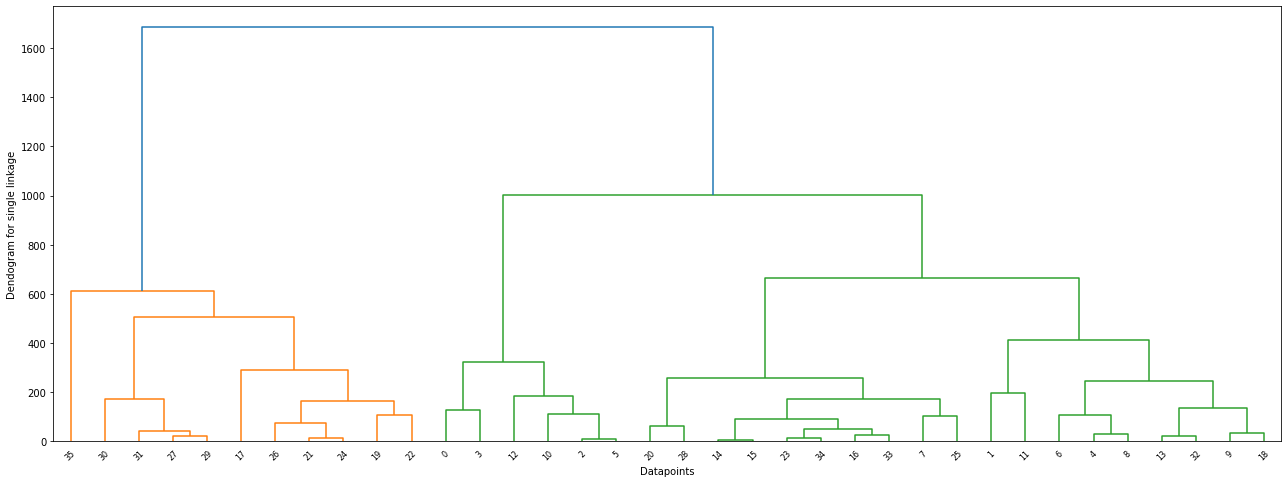

In [30]:
# Plot dendrogram for complete linkage.
# Set 'method' attribute to 'complete'.
c_distance2 = linkage(cars_num, method = "complete")

# Set the size of the plot as (22,8).
plt.figure(figsize = (22, 8))

# Set 'xlabel' and 'ylabel'.
plt.xlabel("Datapoints")
plt.ylabel("Dendogram for single linkage")
# Create dendrogram using the `dendrogram()` function.
dendrogram(c_distance2)
plt.show()

**Q:** Write your observations from the dendrogram.

**A:** We observe there is no overlapping of clusters, If we draw a horizontal line passing throgh the longest  vertical blue line, it cuts the dendogram at 3 points, hence the no of clusters can be 3. Hence the dendogram is clearly better for obtaining distinct clusters.

---

#### Activity 3: Agglomerative Clustering

In this activity, you need to obtain 3 clusters of cars using agglomerative clustering for complete linkage.

In [28]:
# Determine the clusters using agglomerative clustering.
hc = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
hcluster = hc.fit_predict(cars_num)
print(hcluster)


[2 0 2 2 0 2 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1]


Add the obtained clusters to the `cars_df` DataFrame as the last column: 

In [31]:
# Adding the cluster ID back to the ngo_df DataFrame 
cars_df["cluster_label"] = hcluster
cars_df.head()


,Car,Model,Volume,Weight,CO2,cluster_label
0,Toyoty,Aygo,1000,790,99,2
1,Mitsubishi,Space Star,1200,1160,95,0
2,Skoda,Citigo,1000,929,95,2
3,Fiat,500,900,865,90,2
4,Mini,Cooper,1500,1140,105,0


Determine the total number of cars in each cluster:

In [33]:
# Check the cars count per cluster
cars_df["cluster_label"].value_counts()

0    19
1    11
2     6
Name: cluster_label, dtype: int64

**Q**: How many cars are present in cluster `1`.

**A**: 11 cars.

#### Determining Cluster Tendency

Before we apply any clustering algorithm to the given dataset, it is essential to determine whether the given data has any meaningful clusters or not. In general, we need to check whether the given dataset is not random.

This process of evaluating whether the dataset is feasible for clustering is known as **clustering tendency**. A well-known test for cluster tendency is the **Hopkins Test**. 

**Hopkins test:**

- It is a statistical test that checks if the data follows uniform distribution. 
- For example, refer to the following image which illustrates a uniformly distributed dataset.


- Such uniformly distributed dataset is not suitable for clustering.

- If the hopkins score is low (tends to `0`), it means that the data is not uniformly distributed and can be used for clustering. 

- If the hopkins score is high (above `0.5`), it means that the data is uniformly distributed and cannot be used for clustering. 

**Implementing Hopkins Test using Python:**

- The `pyclustertend` is a Python toolkit for assessing cluster tendency.

- Let us first install `pyclustertend` module using `!pip install`.


Once the `pyclustertend` module have been successfully installed, use  `hopkins()` function to determine the hopkins score for your dataset. The syntax for `hopkins()` function is as follows:

`pyclustertend.hopkins(data_frame, sampling_size)`

Where, 
- `data_frame`:  The input dataset.
- `sampling_size`: The sampling size which is used to evaluate the number of DataFrame. This value must be equal to or less than the number of rows of our dataset. 

    For example, If sampling size is 100, then this function generates 100 random data points which are uniformly distributed and then compares our dataset with these 100 points to determine how much they are similar. If our dataset is very similar to these random uniformly distributed dataset, then we will get a high score otherwise a low score.

This function returns a **hopkins score** of the dataset (between `0` and `1`).  A score tending to `0` express a high cluster tendency and a score around `0.5` express no clusterability.



**Note:** If you assume a sampling size greater than the number of rows, you will get an error stating that the sampling size is greater than DataFrame size.

#### NGO Problem Statement

An international charitable NGO  raised around $\$$10 million after a few funding programmes. The CEO of the NGO needs to decide which countries are in immediate need of this fund so that these funds are utilised optimally and effectively.

Our job is to cluster the countries using some socio-economic and health factors that determine the overall development of the country and provide suggestions of the countries to the CEO of the NGO.

We will use a dataset of 167 countries consisting of following attributes:

|Attribute|Description|
|-|-|
|`country`|Name of the country.|
|`child_mort` | Death of children under 5 years of age per 1000 live births.|
|`exports`| Exports of goods and services per capita. Given as percentage of the GDP per capita.|
|`health`| Total health spending per capita. Given as percentage of GDP per capita.|
|`imports` | Imports of goods and services per capita. Given as percentage of the GDP per capita.|
|`income` | Net income per person.|
|`inflation` | The measurement of the annual growth rate of the Total GDP.|
|`life_expec` | The average number of years a new born child would live if the current mortality patterns are to remain the same.|
|`total_fer` |The number of children that would be born to each woman if the current age-fertility rates remain the same.|
|`gdpp` | The GDP per capita. Calculated as the Total GDP divided by the total population.|

**Dataset Credits:** https://www.kaggle.com/gauravduttakiit/help-international

In [35]:
# Import the Python modules, read the dataset and create a Pandas DataFrame.
import seaborn as sns
ngo_df =  pd.read_csv("Country-data.csv")
ngo_df.head()

FileNotFoundError: ignored

In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset. 


#### Data Preparation and EDA 

From the dataset description, we may observe that  the values of  `exports`, `health`, and `imports` columns are expressed in the form of percentage of the GDP (`gdpp`). 

Let us change these column values from  percentage of total GDP to actual values, as the percentage values may not give a clear picture of that country. 




In [36]:
# Convert column values from percentage to actual values.
ngo_df["exports"] = (ngo_df["exports"] * ngo_df["gdpp"]) / 100
ngo_df["health"] = (ngo_df["health"] * ngo_df["gdpp"]) / 100
ngo_df["imports"] = (ngo_df["imports"] * ngo_df["gdpp"]) / 100


NameError: ignored

In [ ]:
# Keep only the numerical columns.


In [ ]:
# Normalise the column values.
# Import StandardScaler module from sklearn


# Create an object for StandardScaler()


# Fit and transform the DataFrame


In [38]:
# Create a corrleation heatmap.
corr_df = ngo_scalled.corr()
# print(corr_df)
corr_df

NameError: ignored

From the above correlation heatmap, we can observe that:

- `gdpp` and `income` has  high positive correlated with correlation of `0.9`. This means that the countries where people have high income will have high GDP.

- `child_mort` and `life_expec` are negatively correlated with a high correlation of `-0.89`. Thus, child mortality rate greatly impacts the overall life expectancy of the population.

- `child_mort` and `total_fer` are highly correlated with correlation of `0.85`. It may be due to the fact that if child mortality is higher, people may opt for more children. 

- `imports` and `exports` are highly correlated with correlation of `0.99`.

- `gdpp` and `health` are highly correlated with correlation of `0.92`.

- `life_expec` and `total_fer` are negatively correlated with a high correlation of `-0.76`.  It may be due to unavailability of  health care system for better care for children as well as care for family planning.

Let us now plot boxplots to understand the distribution of numerical columns and detect whether there are any outliers in the dataset. Use subplots to create these boxplots. 

Before plotting boxplots, let us give colours to our boxplots by building a colour palette. To build a colour palette, use `color_palette()` function of `seaborn` module which will return a list of colours defining a palette.

For more detailed syntax of `color_palette()` function, use `help()` function.

In [ ]:
# Save a palette to a variable.

 
# Use palplot and pass in the variable:


In [ ]:
# Create boxplots for numeric columns using subplot.

# As there are 9 columns, we created subplot having 3 rows and 3 columns.


---

In [ ]:
# Plot dendrogram for single linkage.


In [ ]:
# Plot dendrogram for complete linkage.


In [ ]:
# S4.3: Determine the clusters using agglomerative clustering.
# Import AgglomerativeClustering module from sklearn


# Perform AgglomerativeClustering using n_clusters = 3 and linkage = 'complete'


In [ ]:
# Adding the cluster ID back to the ngo_df DataFrame 


In [ ]:
# Checking the country count per cluster




From the domain understanding,  we know  that child mortality, income, GDP, and healthcare budget are some important factors that decide the development of any country. Hence, we will proceed with analysing the clusters by comparing how these 4 components (`child_mort`, `income`, `gdpp`, `health`) vary for each cluster of countries. 

For this, let us create following four scatter plot using subplots:
1. Scatter plot of `gdpp` vs `child_mort`
2. Scatter plot of `income` vs `child_mort`
3. Scatter plot of `gdpp` vs `income`
4. Scatter plot of `income` vs `health`

In [ ]:
# Visualise clusters using scatter plots.


From the above graph, we observe that following three clusters are obtained:
- <b><font color = 'green'>Cluster `0`</b></font>: 

- <b><font color = 'darkorange'>Cluster `1`</b></font>: 

- <b><font color = 'blueviolet'>Cluster `2`</b></font>: 

Let us analyse the mean and median values of all the features of each cluster by grouping `ngo_df` DataFrame based on cluster labels.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html



In [ ]:
# S1.2: Perform 'groupby' analysis to analyse the mean value of each column.


In [ ]:
# S1.3: Perform 'groupby' analysis to analyse the median value of each column.


You may observe a huge difference between mean and median values of the columns for cluster `0`. It may be due to the outliers in the dataset. 

From both mean and median values, you may observe that the Cluster `0` countries have the highest child mortality, total fertility, and lowest value of other attributes like exports, healthcare budget, income, etc.

Let us create barplots for all the columns of `ngo_df` DataFrame except the `country` column. The $x$-axis of these barplots will show the cluster labels (i.e. `0`, `1`, `2`) and $y$-axis shows the corresponding column value for each cluster label. 

Use subplots to display these 9 barplots colour coded with `bp_palette` colour palette.


In [ ]:
# S1.4: Create barplot for all numeric columns using subplot.
 
# As there are 9 columns, we created subplot having 3 rows and 3 columns.
# initiliase count to 1 and not 0 to exclude 'country' column.



Based on the graphs above,  we should consider cluster `0` countries for NGO aid, because :
- It has the highest child mortality.
- Lowest exports and imports.
- Lowest income.
- Lowest GDP.
- Lowest health expenditure.
- The highest inflation.
- Comparatively low life expectancy.
- Highest total fertility.

Let us list down top 10 countries that require financial aid on priority by sorting column values of `child_mort`, `income`, `health`, and `gdpp` columns. 

For this, apply `sort_values()` function on `ngo_df` DataFrame for cluster label `0`. Sort `child_mort` column value in descending order and remaining three column values in ascending order, as we need countries having higher child mortality as well as lower income, healthcare budget and GDP in top 10.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [ ]:
# S1.5: List top 10 countries of Cluster 0 that are in dire need of financial aid and store it in 'hc_top10' variable.


In [ ]:
# S1.6: List down the values of 'country' column of 'hc_top10' 
